In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
test_results_dir = "../../core/build/test-results/jmc-report/"

def read_test_results(file_path):
    data = {
        "random": {},
        "trust": {},
    }
    for dir in os.listdir(file_path):
        if dir.startswith("random"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["random"][num_threads] = json.load(f)
        elif dir.startswith("trust"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["trust"][num_threads] = json.load(f)
    return data

test_data = read_test_results(test_results_dir)
test_data

{'random': {6: {'time': 1800166,
   'coverage': [247,
    649,
    1006,
    1382,
    1724,
    2059,
    2337,
    2613,
    2909,
    3202,
    3462,
    3715,
    3979,
    4252,
    4514,
    4766,
    5010,
    5250,
    5477,
    5692,
    5918,
    6152,
    6381,
    6606,
    6828,
    7020,
    7221,
    7423,
    7617,
    7827,
    8031,
    8232,
    8427,
    8622,
    8812,
    9020,
    9190,
    9375,
    9561,
    9746,
    9909,
    10081,
    10263,
    10457,
    10642,
    10809,
    10985,
    11173,
    11333,
    11514,
    11664,
    11850,
    12016,
    12165,
    12333,
    12478,
    12623,
    12779,
    12949,
    13106,
    13281,
    13444,
    13604,
    13756,
    13895,
    14044,
    14200,
    14336,
    14470,
    14615,
    14756,
    14896,
    15038,
    15184,
    15353,
    15494,
    15642,
    15773,
    15907,
    16046,
    16200,
    16323,
    16463,
    16588,
    16713,
    16857,
    16988,
    17113,
    17254,
    17389,
    1751

In [3]:
# Adding custom data for trust (without measuring coverage and assuming fixed cost per iteration)

test_data["trust"][6] = {
    'time': 992000,
    'coverage': np.linspace(0, 518400, 992)
}

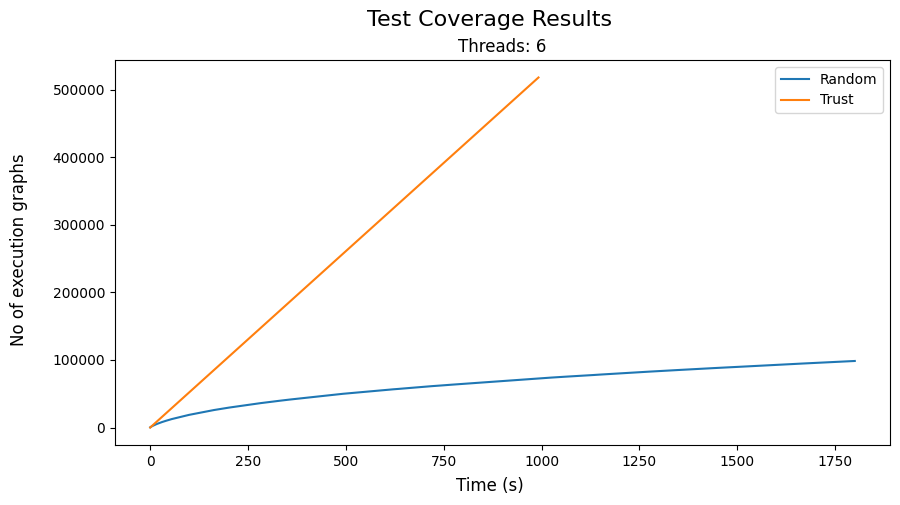

In [5]:
def plot_test_data(data):
    num_plots = len(data["random"].keys())
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    fig.suptitle("Test Coverage Results", fontsize=16)
    fig.supxlabel("Time (s)")
    fig.supylabel("No of execution graphs")

    BASE_THREADS_OFFSET = 6

    for (threads,cov_data) in data["random"].items():
        total_time = cov_data["time"]/1000
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Random")
            axs[threads-BASE_THREADS_OFFSET].set_title(f"Threads: {threads}")
        else:
            axs.plot(x, coverage, label="Random")
            axs.set_title(f"Threads: {threads}")
    
    for (threads,cov_data) in data["trust"].items():
        total_time = cov_data["time"]/1000
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Trust")
        else:
            axs.plot(x, coverage, label="Trust")
    
    plt.legend()
    plt.savefig("test_coverage_results.png")

plot_test_data(test_data)
